In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("All libraries imported successfully")



All libraries imported successfully


In [4]:
import pandas as pd

df = pd.read_excel("data_45.xlsx")

df.head()

,StoreA,StoreB,Unnamed: 2,Sales in two stores (artificial values in Euros)
0,80.469198,200.578171,NaN,A retail company operates two stores: Store A ...
1,634.536558,542.931067,NaN,NaN
2,544.124517,483.193178,NaN,NaN
3,274.354949,292.099951,NaN,NaN
4,460.786547,426.614466,NaN,NaN


In [5]:
df = df[["StoreA", "StoreB"]]
df.head()

,StoreA,StoreB
0,80.469198,200.578171
1,634.536558,542.931067
2,544.124517,483.193178
3,274.354949,292.099951
4,460.786547,426.614466


In [6]:
df.describe()

,StoreA,StoreB
count,20.000000,20.000000
mean,544.164186,471.325548
std,379.392225,250.762314
min,44.383277,84.645704
25%,292.539219,305.858919
50%,448.739037,418.270690
75%,787.856107,641.281398
max,1503.875773,1072.732147


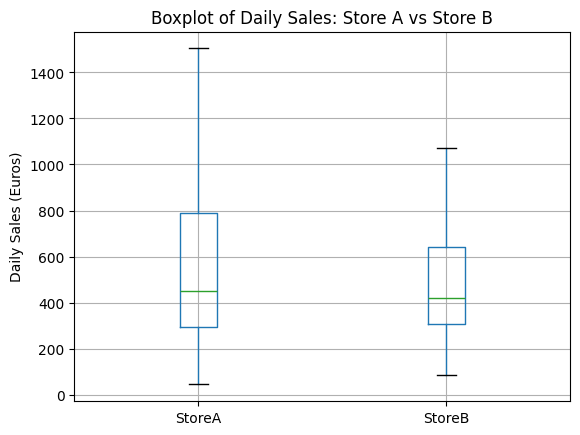

In [7]:
df.boxplot()
plt.title("Boxplot of Daily Sales: Store A vs Store B")
plt.ylabel("Daily Sales (Euros)")
plt.show()